<a href="https://colab.research.google.com/github/forexms78/AI-05-/blob/main/DNN%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 이진분류에 도움이되는 make_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

## 실제 데이터 모델링

In [4]:
## Step1 : 데이터 수집

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset


# 총 300개의 샘플 생성
# 각샘플은 2개의 특징을가짐
# 데이터의 복잡성을 조절하는 옵션 2개의 특징중 1개만 중요하고 클래스별로 1개의 군집만 갖도록 설정
# 결과를 재현하기 위한 시드값 33
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                            n_informative=1, n_clusters_per_class=1,
                            random_state=33)

# 훈련세트와 평가세트로 나누는 역할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, shuffle=True)

# numpy로 나온 훈련데이터를 tensor로 변환 32비트 소스점으로 지정
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

X_train.shape, X_test.shape

print(X)
print(y)

[[ 1.80227255e+00 -1.42962864e+00]
 [-1.71548469e+00  1.93574500e+00]
 [-4.63792502e-01  3.48464829e-01]
 [ 6.66412645e-01 -3.16657630e-01]
 [ 1.41018470e-01  2.63162767e+00]
 [-3.52486887e-01  1.76578131e-02]
 [ 2.35216532e+00  1.21377022e-01]
 [ 2.50220461e+00  7.47085897e-01]
 [ 2.52385903e-01  5.89846730e-02]
 [ 9.76568889e-01  9.16210345e-02]
 [-7.44927761e-01 -2.80956778e-02]
 [ 1.09018050e+00  7.29986431e-01]
 [-1.29134919e+00 -1.84338723e-01]
 [ 1.03305033e+00 -6.61757038e-01]
 [ 7.60216117e-01  1.09808364e+00]
 [-1.28661727e+00 -6.13535145e-01]
 [ 7.85596054e-01 -1.60248278e-01]
 [ 1.42742493e+00  1.76735838e-02]
 [ 1.25954271e+00 -1.18892164e+00]
 [ 9.21549042e-01 -1.09652413e+00]
 [-6.33233795e-01 -5.91836068e-01]
 [ 1.27258075e+00  7.64034689e-01]
 [-3.22838879e-01 -1.05521943e+00]
 [-2.37594565e-02 -1.71741412e+00]
 [ 3.08138099e-01  3.92756259e-01]
 [-6.83153552e-01 -7.62953346e-03]
 [ 1.75599363e+00  3.45330061e-01]
 [-3.29998966e-01  7.07367241e-01]
 [ 2.04684470e+00 -2

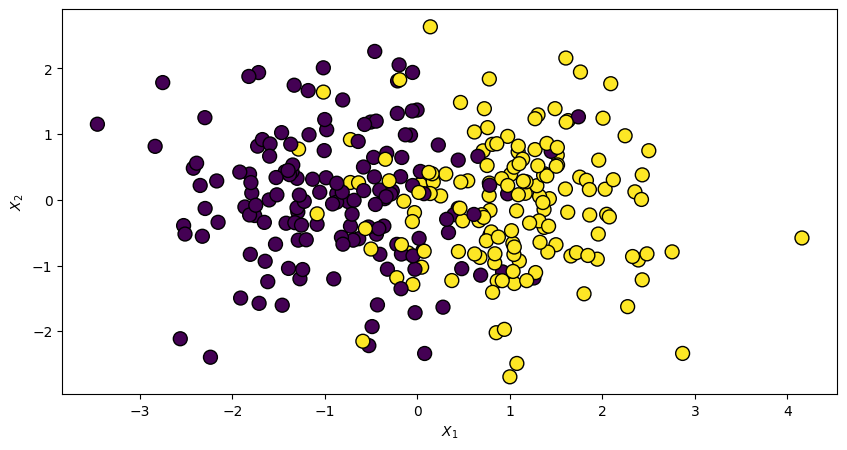

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors="k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [6]:
## Step 2 : 모델 만들기
# 모든신경망의 기본 클래스

class SimpleNN(torch.nn.Module):

    # 부모클래스의 메소드를 호출하여 초기화하는 과정
    def __init__(self):
        super(SimpleNN, self).__init__()
        # linear은 완전 연결을 하겟다 특징이 2개이고 10개의 출력뉴턴을 가진다
        self.layer1 = torch.nn.Linear(2, 10)
        # layer1에서 나온 값에서 10개의 출력을 받아서 1개의 출력뉴런을 생성하겠다
        self.layer2 = torch.nn.Linear(10, 1)

    # 모델이 데이터를 받아 어떻게 처리할지 정의한느 과정
    def forward(self, x):
        # 시그모이드함수사용
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

model = SimpleNN()
print(model)

SimpleNN(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)


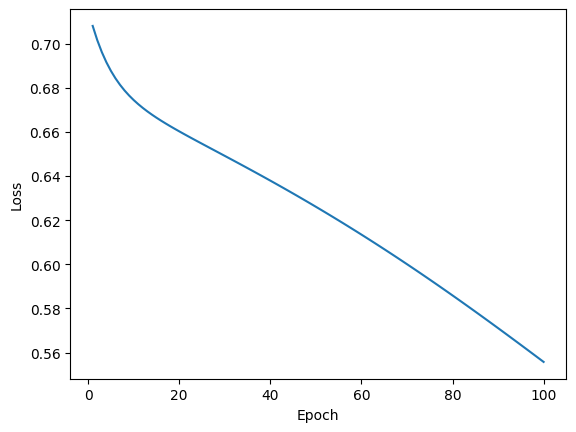

In [7]:
### Step 3. 모델 학습시키기

# 학습률 0.1과 같음
LR = 1e-1
# 2진교차 엔트로피 손실을 나타냄 오차(손실)을 계산함
criterion = torch.nn.BCELoss()
#SGD는 경사하강법 옵티마이저 모델의 가중치를 조금씩 업데이트하여 손실을 최소화하는 방향
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

# 전체 데이터셋 100번 학습
EPOCH = 100
# 210개를 한묵음으로 사용하고 다음 90개로 또 업데이트한다
BATCH_SIZE = 210

dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

losses = []

for epoch in range(EPOCH):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

plt.plot(range(1, EPOCH+1), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()